<a href="https://colab.research.google.com/github/fwkhan/CE888/blob/main/lab4/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Reading Data File

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv', header=None)
train = data.copy()

# Replacing 99(No Rating) with NaN

In [ ]:
test = data.replace(99, np.NaN)

In [ ]:
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74.0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,100.0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49.0,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,48.0,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,91.0,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,100.0,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,91.0,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,NaN,NaN,NaN,NaN,NaN,4.90,NaN,NaN,NaN,NaN,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,39.0,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,NaN,NaN,-6.46,-1.65,-6.80,-6.41,-6.99,7.23,6.75,-6.99,6.55,NaN,NaN,NaN,NaN,0.49,-0.53,-6.94,-0.49,NaN,6.46,-0.53,NaN,NaN,-7.86,-0.34,NaN,-6.94,NaN,...,0.49,-0.24,NaN,NaN,-3.11,-6.65,NaN,-0.58,6.31,NaN,NaN,-7.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24981,37.0,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,NaN,NaN,NaN,-9.47,NaN,3.45,-0.92,-4.51,-4.13,-5.73,-9.51,2.82,NaN,NaN,NaN,NaN,-0.49,2.91,2.62,8.30,NaN,3.06,5.44,NaN,NaN,-0.68,2.04,NaN,

# Dropping column 0, as it doesn't contain ratings, it is the number of jokes rated by the user

In [ ]:
train = train.drop(0, axis=1)
test = test.drop(0, axis=1)

In [ ]:
train

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.00,99.00,99.00,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,7.33,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.00,99.00,99.00,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,2.82,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.00,99.00,99.00,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,4.42,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,8.50,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,99.00,99.00,99.00,99.00,99.00,4.90,99.00,99.00,99.00,99.00,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,99.00,99.00,99.00,-6.46,-1.65,-6.80,-6.41,-6.99,7.23,6.75,-6.99,6.55,99.00,99.00,99.00,99.00,0.49,-0.53,-6.94,-0.49,99.00,6.46,-0.53,99.00,99.00,-7.86,-0.34,99.00,-6.94,99.00,99.00,...,0.49,-0.24,99.00,99.00,-3.11,-6.65,99.00,-0.58,6.31,99.00,99.00,-

In [ ]:
train.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
count,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,...,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.00000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000
mean,34.401435,27.094089,33.263717,36.244936,0.427236,19.342119,-0.401803,-0.616110,36.228421,19.520763,14.107285,11.445280,-1.754815,11.038325,-1.682015,-3.072122,-1.103119,-0.619151,0.174010,-0.921997,2.336112,14.812794,19.702896,35.003861,16.831144,6.108754,3.492787,5.393417,3.160797,27.448552,3.465963,3.290261,31.892051,14.294251,3.125464,3.381442,31.184107,9.610589,8.527044,11.138871,...,3.147019,3.156669,19.295580,30.078602,3.261098,2.773196,29.075706,2.804985,2.818099,19.205059,64.955502,65.511747,65.230747,63.738037,64.060745,64.784238,63.813772,63.885116,63.075803,63.645943,63.130073,63.174054,62.956359,62.417244,62.222051,61.607885,62.263703,61.753387,62.469264,60.689216,61.462019,60.27989,60.421701,59.059621,58.749897,58.541104,58.017246,57.061650,55.753357,60.138090
std,46.707059,44.228006,46.747535,48.812967,5.472657,37.860770,5.741616,5.008894,48.228364,38.329975,32.641415,29.938683,5.155992,29.526365,5.355089,5.281486,4.532969,5.039152,5.083095,5.216848,6.856606,34.587240,39.682897,48.637167,37.051743,21.688893,7.074558,19.659326,6.401350,44.864605,12.037673,5.717119,47.440118,34.057662,5.703922,4.991137,47.176688,27.673845,26.397293,30.228748,...,9.383020,6.160750,39.238572,46.233500,10.976394,6.659336,45.963476,6.105714,6.822990,38.955997,47.396153,45.921201,46.644798,48.075806,47.520009,46.243016,47.220253,46.804611,47.675717,47.133626,47.002169,47.332326,46.966353,47.621754,47.593983,47.967071,47.183236,47.224021,46.479714,48.088127,47.335405,47.94644,47.359847,48.196204,48.310728,48.130562,48.164681,48.717455,49.237139,47.913531
min,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,...,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.95000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000
25%,-0.150000,-2.180000,-1.145000,-3.350000,-3.690000,-0.390000,-5.290000,-4.610000,-1.775000,-0.830000,-0.530000,-1.020000,-6.260000,-1.410000,-6.210000,-7.430000,-4.420000,-4.420000,-3.450000,-5.050000,-0.730000,-1.840000,-2.480000,-3.690000,-2.280000,-1.500000,0.730000,-1.410000,0.340000,-2.380000,-0.580000,0.680000,-3.640000,-

# Best Joke

In [ ]:
best_joke = np.argmax(test.mean(axis=0))

In [ ]:
best_joke

49

# Worst Joke

In [ ]:
worst_joke = np.argmin(test.mean(axis=0))

In [ ]:
worst_joke

57

# Generating Validation set by adding 10% 99 in the train data set

In [ ]:
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(arr!=99)
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [ ]:
arr = train.values
new_arr, idx = replace(arr, 0.1)

In [ ]:
validation_set = pd.DataFrame(new_arr)
validation_set

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,99.00,-9.85,99.00,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,99.00,5.68,-4.81,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,99.00,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,99.00,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,99.00,9.03,99.00,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,99.00,7.52,-5.00,99.00,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,99.00,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,99.00,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,99.00,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,7.33,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.00,99.00,99.00,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,99.00,1.17,-6.60,99.00,99.00,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,2.82,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,99.00,6.84,-3.93,99.00,-2.33,99.00,2.72,-1.36,2.57,4.51,8.20,99.00,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,99.00,4.51,2.48,...,7.38,6.17,4.71,-2.28,99.00,4.56,7.14,4.22,3.01,3.83,99.00,99.00,99.00,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,99.00,99.00,99.00,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,99.00,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,99.00,-9.22,-0.15,-6.46,5.63,99.00,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,99.00,-0.58,4.42,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,99.00,99.00,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,99.00,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,9.13,-8.16,8.59,9.08,0.87,99.00,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,8.50,...,2.77,8.11,-7.96,99.00,-0.87,-5.87,8.88,-1.12,-8.74,8.74,99.00,99.00,99.00,99.00,99.00,4.90,99.00,99.00,99.00,99.00,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,99.00,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,99.00,99.00,99.00,-6.46,99.00,-6.80,99.00,-6.99,7.23,6.75,-6.99,6.55,99.00,99.00,99.00,99.00,0.49,-0.53,-6.94,-0.49,99.00,6.46,-0.53,99.00,99.00,-7.86,-0.34,99.00,-6.94,99.00,99.00,...,0.49,-0.24,99.00,99.00,-3.11,-6.65,99.00,-0.5

# Checking count of 99 in training and validation data set

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
train = sc.fit_transform(train)
train = pd.DataFrame(train)

In [ ]:
train = pd.DataFrame(train)

In [ ]:
(validation_set.values==99).sum()

868890

In [ ]:
(train.values==99).sum()

0

In [ ]:
latent_factor = 4

user_ratings = train.values


In [ ]:
latent_user_preferences = np.random.random((user_ratings.shape[0], latent_factor))
latent_item_features = np.random.random((user_ratings.shape[1], latent_factor))

In [ ]:
latent_item_features.T.shape

(4, 100)

In [ ]:
latent_user_preferences.shape

(24983, 4)

In [ ]:
latent_item_features[:10]

array([[0.80053746, 0.88027221, 0.41017809, 0.18743409],
       [0.41813572, 0.79282431, 0.74934444, 0.2135631 ],
       [0.21822416, 0.87371805, 0.20859866, 0.78658896],
       [0.87539044, 0.26202913, 0.75763014, 0.74308783],
       [0.66061473, 0.5679627 , 0.19313929, 0.2610057 ],
       [0.60668337, 0.22759526, 0.37193077, 0.69515242],
       [0.7096619 , 0.80353981, 0.81744513, 0.26953765],
       [0.18775271, 0.13251454, 0.29011019, 0.10819896],
       [0.25713686, 0.24841585, 0.15819327, 0.54650646],
       [0.61133329, 0.2818964 , 0.77557626, 0.75623912]])

In [ ]:
latent_user_preferences[:10]

array([[0.80891574, 0.79141834, 0.28189185, 0.65114067],
       [0.97278099, 0.14709145, 0.24433128, 0.88508568],
       [0.55599017, 0.91010469, 0.24590198, 0.69823277],
       [0.55088694, 0.30620262, 0.63326403, 0.30759793],
       [0.77858481, 0.66627016, 0.30626089, 0.87354762],
       [0.563915  , 0.97916469, 0.96759908, 0.67891513],
       [0.46356742, 0.22347127, 0.81740243, 0.75585708],
       [0.6141614 , 0.75086778, 0.02596751, 0.31785706],
       [0.02629675, 0.14806739, 0.00897103, 0.27426967],
       [0.40176761, 0.26821707, 0.74053222, 0.10127022]])

In [ ]:
latent_user_preferences.dot(latent_item_features.T)

array([[1.58190274, 1.31598598, 1.43898377, ..., 1.02730864, 0.63296281,
        1.24622164],
       [1.1743427 , 0.89548208, 1.08796657, ..., 1.13963035, 0.50314123,
        1.08003815],
       [1.47796705, 1.28741451, 1.51702239, ..., 1.0239385 , 0.57942052,
        1.1354471 ],
       ...,
       [1.39620194, 1.41237421, 1.40233909, ..., 1.0745154 , 0.53424144,
        1.17978535],
       [0.98953924, 1.0189565 , 0.91258418, ..., 0.98970642, 0.39647256,
        0.98363486],
       [1.30269664, 1.49199954, 1.63393592, ..., 1.25638561, 0.47750133,
        1.12423698]])

In [ ]:
def predict_rating(user_id, item_id):
  user_pref = latent_user_preferences[user_id]
  item_pref = latent_item_features[item_id]
  return user_pref.dot(item_pref)


In [ ]:
def train_fn( rating, alpha=0.0001):
  global latent_user_preferences, latent_item_features
  # predicted_rating = predict_rating(user_id, item_id)
  predicted_rating = latent_user_preferences.dot(latent_item_features.T)
  err = predicted_rating - rating
  user_pref_values = latent_user_preferences
  latent_user_preferences -= alpha * np.dot(err , latent_item_features)
  latent_item_features -= alpha * np.dot(err.T , user_pref_values)
  return err

In [ ]:
def sgd(iterations):
  error = []
  mse_history = []
  for i,itr in enumerate(range(iterations)):

    rating = user_ratings
    # if rating != 99:
    err = train_fn(rating)
    error.append(err)
    mse = (np.array(error)**2).mean()
    

    print('Iteration %d/%d:\tMSE=%.6f' % (itr, iterations, mse))
    mse_history.append(mse)

  return mse_history    

Iteration 0/100:	MSE=0.677222
Iteration 1/100:	MSE=1.150916
Iteration 2/100:	MSE=2.099204
Iteration 3/100:	MSE=3.601915
Iteration 4/100:	MSE=4.870915
Iteration 5/100:	MSE=4.848205
Iteration 6/100:	MSE=4.283084
Iteration 7/100:	MSE=3.773185
Iteration 8/100:	MSE=3.368446
Iteration 9/100:	MSE=3.043933
Iteration 10/100:	MSE=2.778322
Iteration 11/100:	MSE=2.556936
Iteration 12/100:	MSE=2.369573
Iteration 13/100:	MSE=2.208945
Iteration 14/100:	MSE=2.069706
Iteration 15/100:	MSE=1.947846
Iteration 16/100:	MSE=1.840298
Iteration 17/100:	MSE=1.744678
Iteration 18/100:	MSE=1.659101
Iteration 19/100:	MSE=1.582062
Iteration 20/100:	MSE=1.512340
Iteration 21/100:	MSE=1.448939
Iteration 22/100:	MSE=1.391034
Iteration 23/100:	MSE=1.337938
Iteration 24/100:	MSE=1.289074
Iteration 25/100:	MSE=1.243954
Iteration 26/100:	MSE=1.202161
Iteration 27/100:	MSE=1.163340
Iteration 28/100:	MSE=1.127183
Iteration 29/100:	MSE=1.093423
Iteration 30/100:	MSE=1.061829
Iteration 31/100:	MSE=1.032198
Iteration 32/100:	

ValueError: ignored

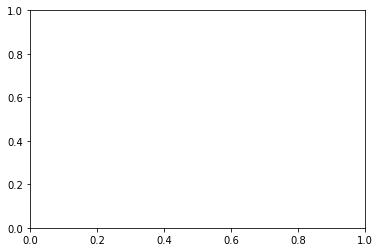

In [ ]:
num_iter = 100
hist = sgd(num_iter)



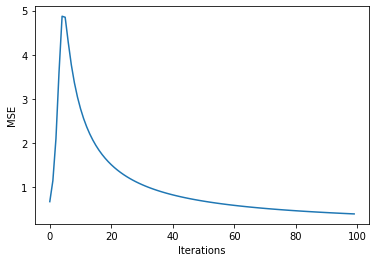

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.arange(0, num_iter, 1), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()